In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('./2022-07-01_bob.csv')
df

,Unnamed: 0,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,미적용,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00
1,1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00
2,2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
3,3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,미적용,0,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
4,4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101097,101813,1364995,640697,205365,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000,116000,INICIS,TRANS,영상 편집,2021-06-15 00:00:00
101098,101814,1364998,670896,204159,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,미적용,0,189000,INICIS,CARD,부동산 개발,2021-02-10 00:00:00
101099,101815,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000,116000,INICIS,VBANK,영상 편집,2021-06-15 00:00:00
101100,101816,1365005,670896,204159,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,미적용,0,189000,INICIS,CARD,부동산 개발,2021-02-10 00:00:00


In [38]:
df = df.drop(columns='Unnamed: 0')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

In [39]:
df.completed_at = pd.to_datetime(df.completed_at, )
df.info()  # dtype -> datetime으로 바꾸기 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

In [40]:
df.marketing_start_at = pd.to_datetime(df.marketing_start_at, )
df.info()  # dtype -> datetime으로 바꾸기 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

## 총 매출 구하기

In [21]:
df.head(5)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2018-11-11,90500,미적용,0,110500,COMM,VBANK,개발자 커리어,2018-11-11
1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2020-12-02,96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-04,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04
3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-04,171810,미적용,0,190900,COMM,CARD,프로그래밍,2021-03-04
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2019-11-14,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14


In [41]:
# 총매출 구하기 위해 PAYMENT 이면서 COMPLETED인 df만 가져오기
p_com = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]
p_com

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14
8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,116000,COMM,CARD,영상 편집,2020-12-02
10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,미적용,0,263000,COMM,CARD,부동산/금융,2020-11-27
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,111000,COMM,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101094,1364969,669238,204286,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000,232000,INICIS,CARD,디자인툴,2021-04-23
101095,1364976,384003,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,미적용,0,149000,KAKAO,CARD,영상 편집,2020-12-02
101096,1364991,670891,203935,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000,179000,INICIS,CARD,백엔드 개발,2021-05-31
101099,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000,116000,INICIS,VBANK,영상 편집,2021-06-15


In [42]:
# 총매출 구하기 위해 REFUND 이면서 COMPLETED인 df만 가져오기
r_com = df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]
r_com

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
645,972377,444760,204122,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,미적용,0,404000,COMM,VBANK,마케팅,2018-11-11
646,972381,472666,203178,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02
660,972409,447177,203989,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,미적용,0,89000,COMM,CARD,일러스트,2021-02-19
666,972422,373915,204264,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,미적용,0,340000,COMM,VBANK,데이터사이언스,2021-03-08
669,972436,456086,300000,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,미적용,0,299000,COMM,CARD,프로그래밍,2018-11-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,미적용,0,179000,NAVER,CARD,백엔드 개발,2021-07-15
100870,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,미적용,0,1400000,INICIS,CARD,마케팅,2018-11-11
100895,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,미적용,0,259000,NAVER,CARD,영상 편집,2021-08-17
100933,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,미적용,0,129000,KAKAO,POINT,엑셀/VBA,2021-08-17


In [43]:
# 총매출 구하기 위해 p_com , r_com df 합치기
prc = pd.concat([p_com,r_com])
prc

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14
8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,116000,COMM,CARD,영상 편집,2020-12-02
10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,미적용,0,263000,COMM,CARD,부동산/금융,2020-11-27
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,111000,COMM,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,미적용,0,179000,NAVER,CARD,백엔드 개발,2021-07-15
100870,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,미적용,0,1400000,INICIS,CARD,마케팅,2018-11-11
100895,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,미적용,0,259000,NAVER,CARD,영상 편집,2021-08-17
100933,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,미적용,0,129000,KAKAO,POINT,엑셀/VBA,2021-08-17


In [35]:
# 총매출 구하기
prc['transaction_amount'].sum()

5972719534

In [44]:
# 결제가 일어난 첫 시점 
prc['completed_at'].min()

Timestamp('2021-03-28 15:21:43')

In [47]:
# 결제가 일어난 마지막 시점
prc['completed_at'].max()

Timestamp('2021-09-25 14:25:47')

In [ ]:
# 3/28 ~ 9/25일까지 총 매출 : 5,972,719,534  (59억)

## 시간별 매출

### 일별 매출 그래프

In [108]:
# index를 completed_at으로 두고 시간별 매출

prc_hour = prc.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
prc_hour

,transaction_amount
completed_at,
0,233549455
1,136075550
2,95817755
3,52194135
4,33338600
5,36766265
6,55248680
7,94951875
8,155896900


In [94]:
prc_hour['transaction_amount'].min()

33338600

In [ ]:
sns.lineplot(data=penguins, y="bill_length_mm", x="bill_depth_mm", hue="species")

Text(0.5, 1.0, 'Revenue By Hour')

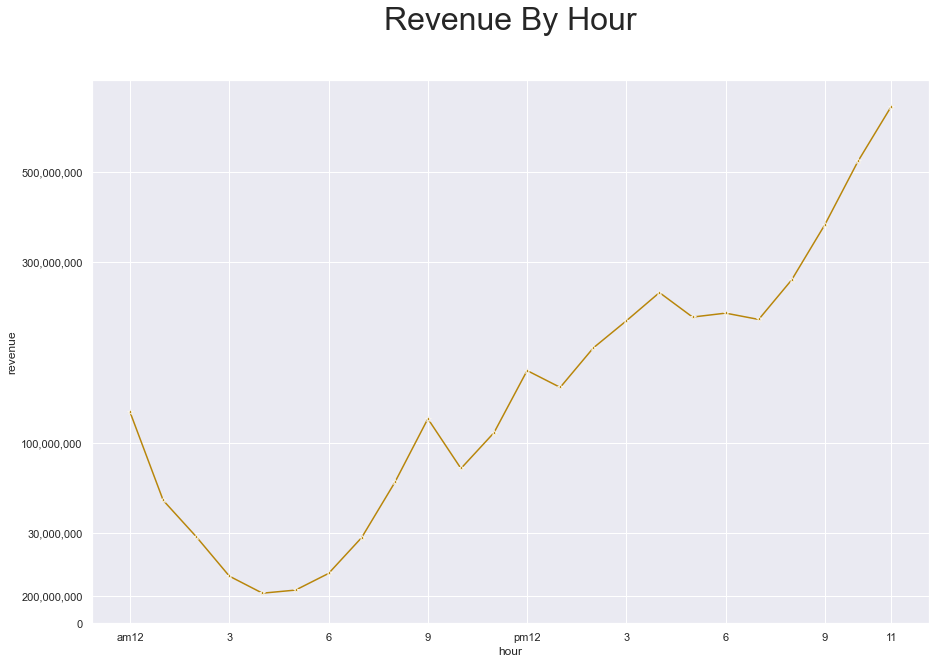

In [118]:
# 시간별 그래프           ## 검토 필요
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
sns.lineplot(x = 'completed_at',y = "transaction_amount",
             color = 'darkgoldenrod', 
             marker='*',
             data=prc_hour)
plt.xlabel('hour')
plt.ylabel('revenue')
plt.yticks([0, 100000000, 200000000, 30000000, 400000000 ,500000000], [0,'30,000,000', '100,000,000', '200,000,000', '300,000,000' ,'500,000,000'])
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21 ,23], ['am12', '3', '6', '9', 'pm12', '3', '6', '9', '11'])
plt.ylim([0, 601732315])
plt.title("Revenue By Hour", fontsize=32, pad=50)

### 요일별 매출 그래프

In [109]:
prc_dweek = prc.set_index('completed_at').groupby(lambda date: date.dayofweek).sum()[['transaction_amount']]
prc_dweek

,transaction_amount
completed_at,
0,794476420
1,859965425
2,902670063
3,708513498
4,819967968
5,737461545
6,1149664615


In [111]:
prc_dweek['transaction_amount'].min()

708513498

Text(0.5, 1.0, 'Revenue By Day of Week')

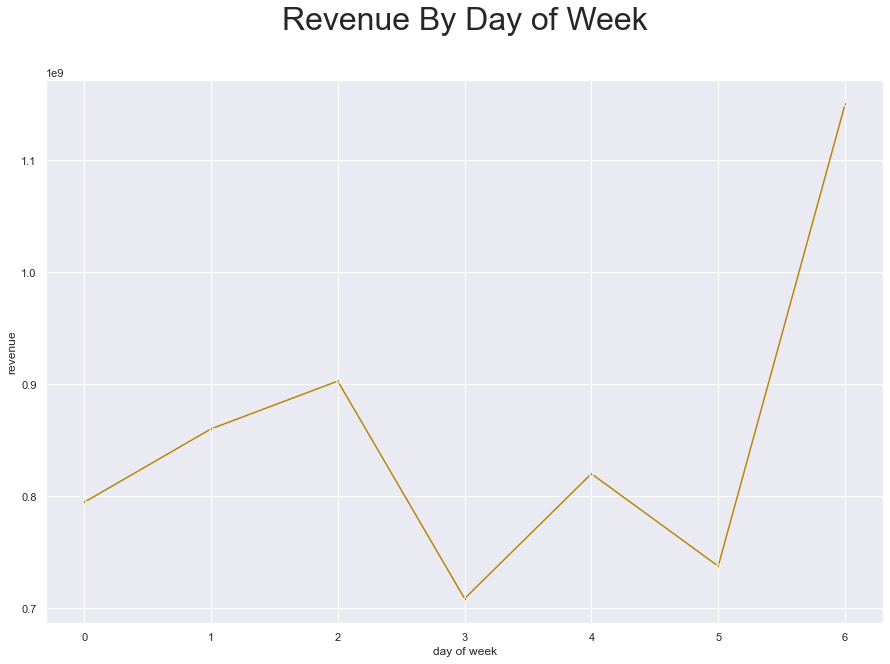

In [119]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
sns.lineplot(x = 'completed_at',y = "transaction_amount",
             color = 'darkgoldenrod', 
             marker='*',
             data=prc_dweek)
plt.xlabel('day of week')
plt.ylabel('revenue')
plt.title("Revenue By Day of Week", fontsize=32, pad=50)


## 일별 매출 그래프

In [120]:
prc_day = prc.set_index('completed_at').groupby(lambda date: date.day).sum()[['transaction_amount']]
prc_day

,transaction_amount
completed_at,
1,120656529
2,136319725
3,132405593
4,178228365
5,141387104
6,165539322
7,154945359
8,165210479
9,177890909


In [123]:
prc_day['transaction_amount'].max()

454108581

Text(0.5, 1.0, 'Revenue By Day')

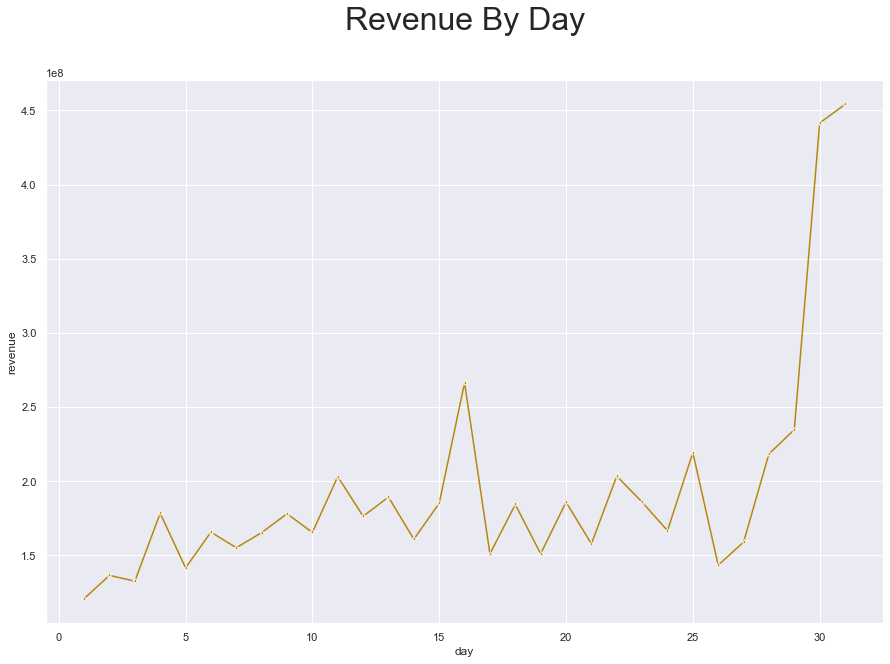

In [124]:
plt.figure(figsize=(15,10))
sns.set_theme(style='darkgrid')
sns.lineplot(x = 'completed_at',y = "transaction_amount",
             color = 'darkgoldenrod', 
             marker='*',
             data=prc_day)
plt.xlabel('day')
plt.ylabel('revenue')
plt.title("Revenue By Day", fontsize=32, pad=50)

## 월별 매출 그래프

## 전체 강의 수

In [127]:
df['course_title'].value_counts().sum()   # 총 강의  

101102

In [128]:
prc['course_title'].value_counts().sum()  # 매출 분석할때 강의 

53040

In [151]:
tran_course_up10 =  prc.set_index('course_title').groupby('course_title').sum()['transaction_amount'].sort_values(ascending=False)[:10]
tran_course_up10   # 강의 상위 10

AttributeError: 'list' object has no attribute 'sort_values'

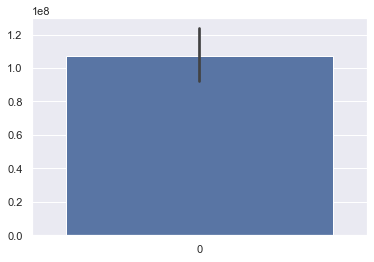

In [149]:
sns.barplot(data = tran_course_up10)
plt.show()